In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot
from warnings import filterwarnings

filterwarnings("ignore")

In [4]:
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df = pd.DataFrame(data)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There are 35 columns and 1470 rows. This means we have 34 features, 1 target to investigate, and 1470 different person's information.

The target is binary.

Out of the 34 available features, 8 of them are in the form of objects and the rest are in the form of numbers.

In [6]:
df1 = df.select_dtypes("object")
df1

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [7]:
df2 = df.select_dtypes("int64")
df2

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


In [8]:
df1.describe().T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In the table above, we can see the number of unique values related to the features that are in the form of objects

In [9]:
df.describe(include="int64").T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [10]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [11]:
have_duplicate_rows = df.duplicated().any()
have_duplicate_rows

False

There is no missing value and duplicate rows in dataset.

🧹Some of columns can be removed, because their values do not affect the analysis results.

Over18: All values are Y
EmployeeCount: all values are 1.0
StandardHours: all values are 80.0
EmployeeNumber: is the id of the employee that their values do not affect the analysis results.

In [12]:
df = df.drop(["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis=1)

In [13]:
# to separate categorical and numerical columns
cat = df.select_dtypes(["object"]).columns
num = df.select_dtypes(["number"]).columns
print(cat)
print(num)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [14]:
for i in cat:
    print("Unique values of", i, set(df[i]))

Unique values of Attrition {'Yes', 'No'}
Unique values of BusinessTravel {'Non-Travel', 'Travel_Frequently', 'Travel_Rarely'}
Unique values of Department {'Human Resources', 'Sales', 'Research & Development'}
Unique values of EducationField {'Human Resources', 'Life Sciences', 'Other', 'Medical', 'Technical Degree', 'Marketing'}
Unique values of Gender {'Male', 'Female'}
Unique values of JobRole {'Research Scientist', 'Manager', 'Human Resources', 'Sales Representative', 'Laboratory Technician', 'Sales Executive', 'Research Director', 'Healthcare Representative', 'Manufacturing Director'}
Unique values of MaritalStatus {'Single', 'Divorced', 'Married'}
Unique values of OverTime {'Yes', 'No'}


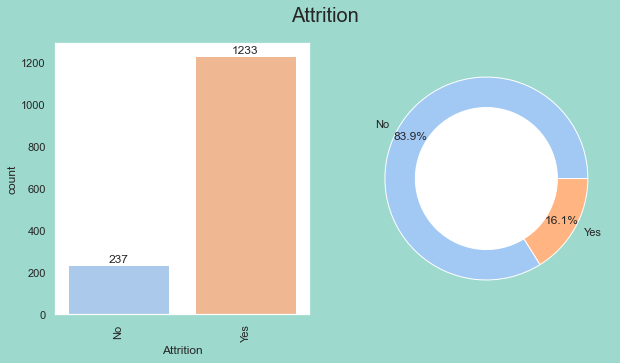

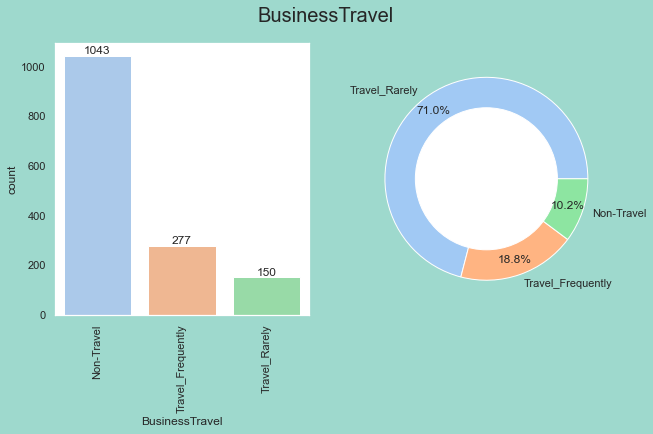

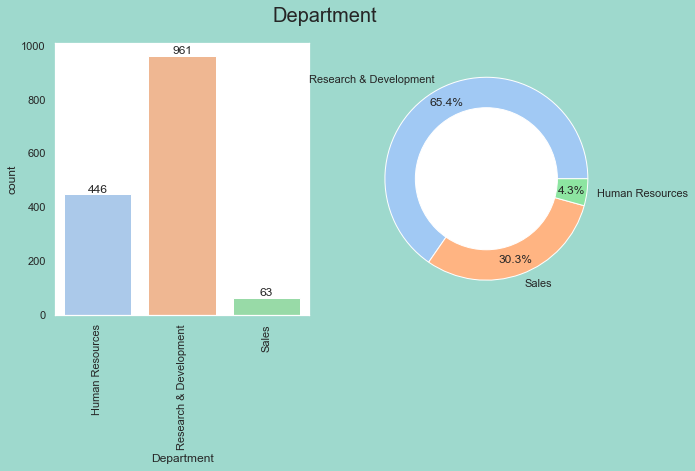

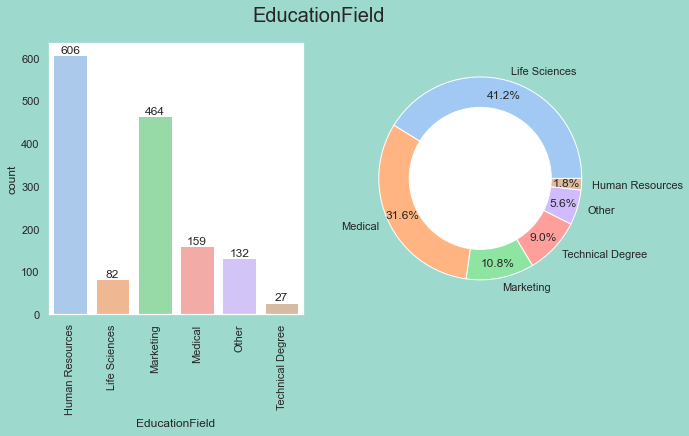

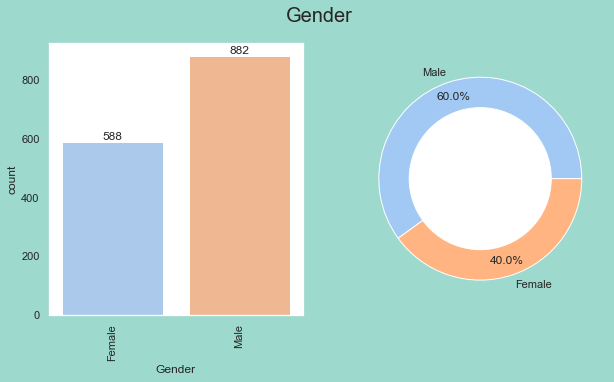

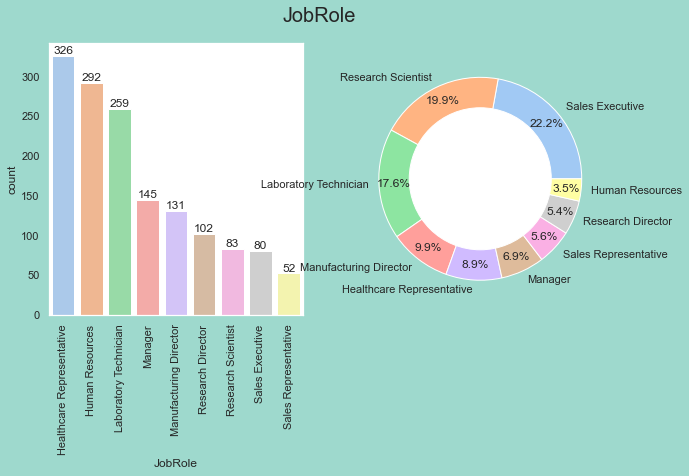

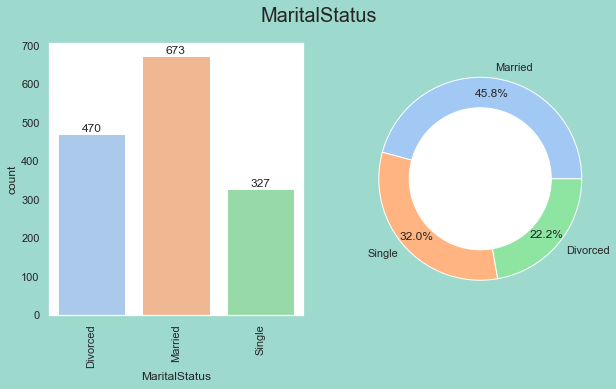

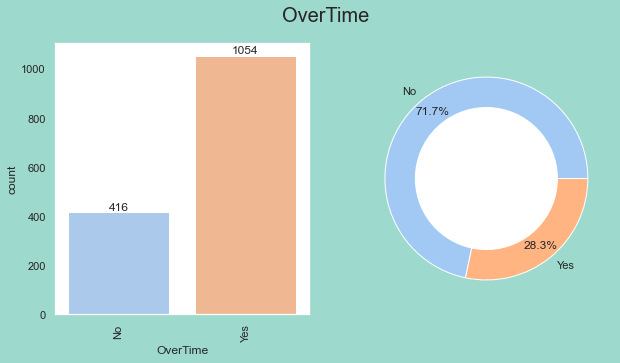

In [15]:
import seaborn as sns

# univariate analysis of categorical data:
sns.set(rc={"axes.facecolor": "white", "figure.facecolor": "#9ed9cd"})
sns.set_palette("pastel")

for i, col in enumerate(cat):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    ax = sns.countplot(data=df, x=col, ax=axes[0])
    activities = [var for var in df[col].value_counts().sort_index().index]
    ax.set_xticklabels(labels=activities, rotation=90)
    for container in axes[0].containers:
        axes[0].bar_label(container)

    index = df[col].value_counts().index
    size = df[col].value_counts().values
    explode = (0.05, 0.05)

    axes[1].pie(size, labels=index, autopct="%1.1f%%", pctdistance=0.85)

    centre_circle = plt.Circle((0, 0), 0.70, fc="white")
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.suptitle(col, backgroundcolor="#9ed9cd", fontsize=20)

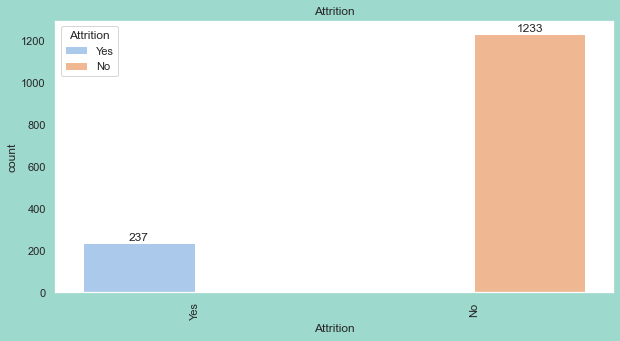

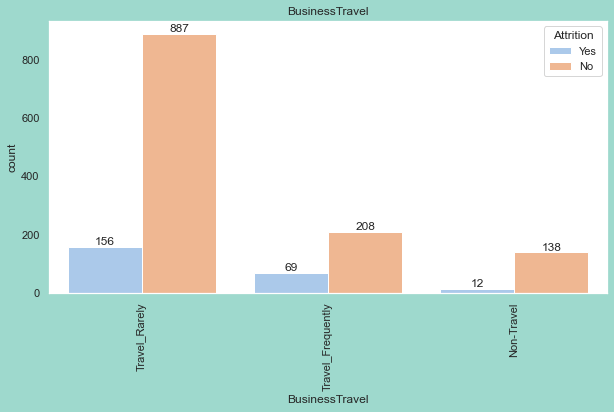

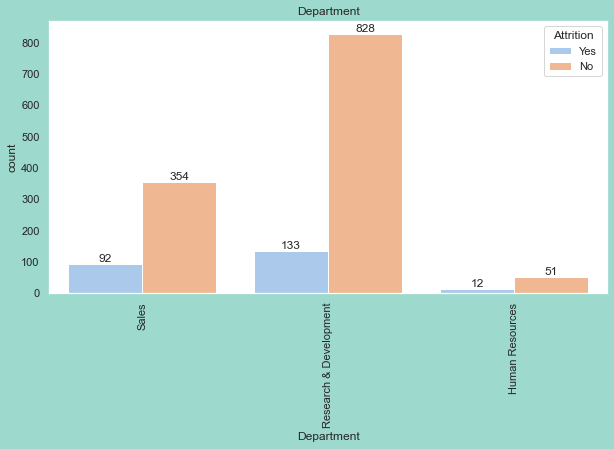

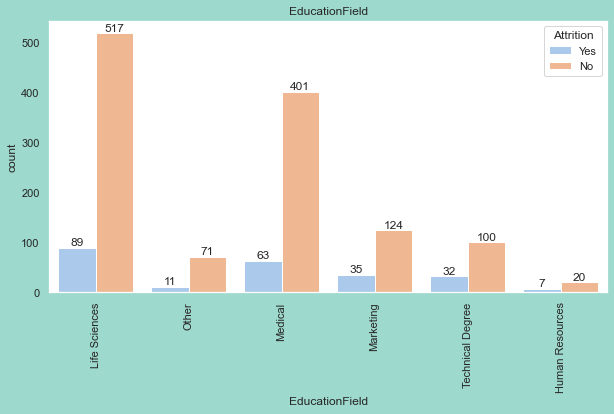

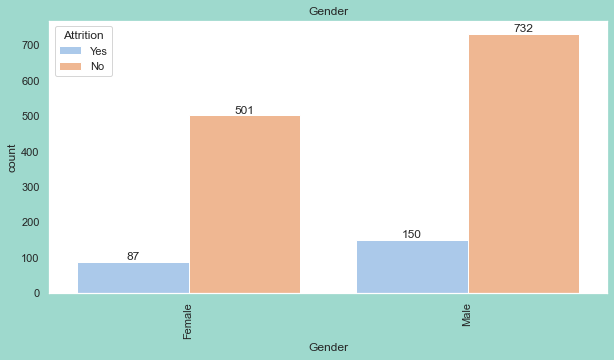

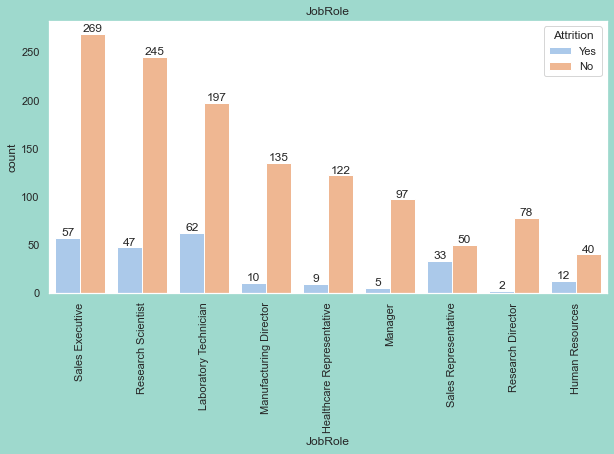

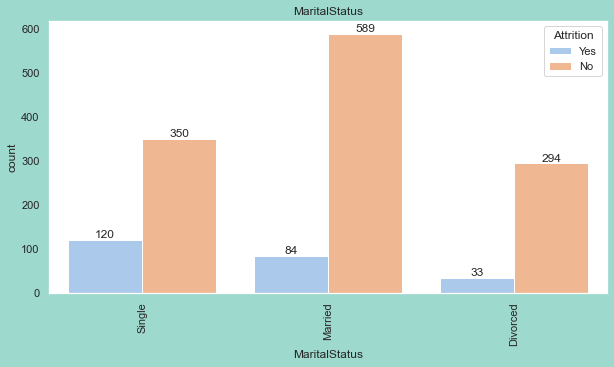

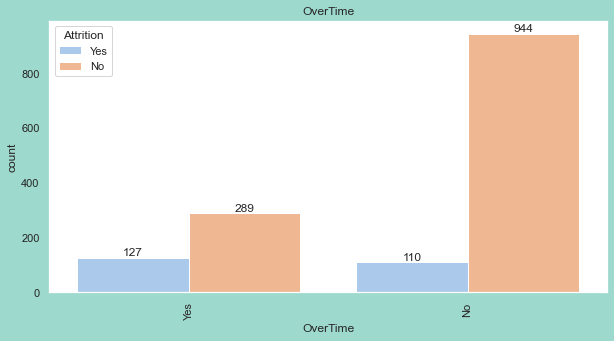

In [16]:
for column in cat:
    plt.figure(figsize=(10, 5))

    ax = sns.countplot(x=df[column], data=df, hue="Attrition")

    for container in ax.containers:
        ax.bar_label(container)
    plt.title(column)
    plt.xticks(rotation=90)
    plt.xlabel(column)
    # plt.grid()
    plt.show()

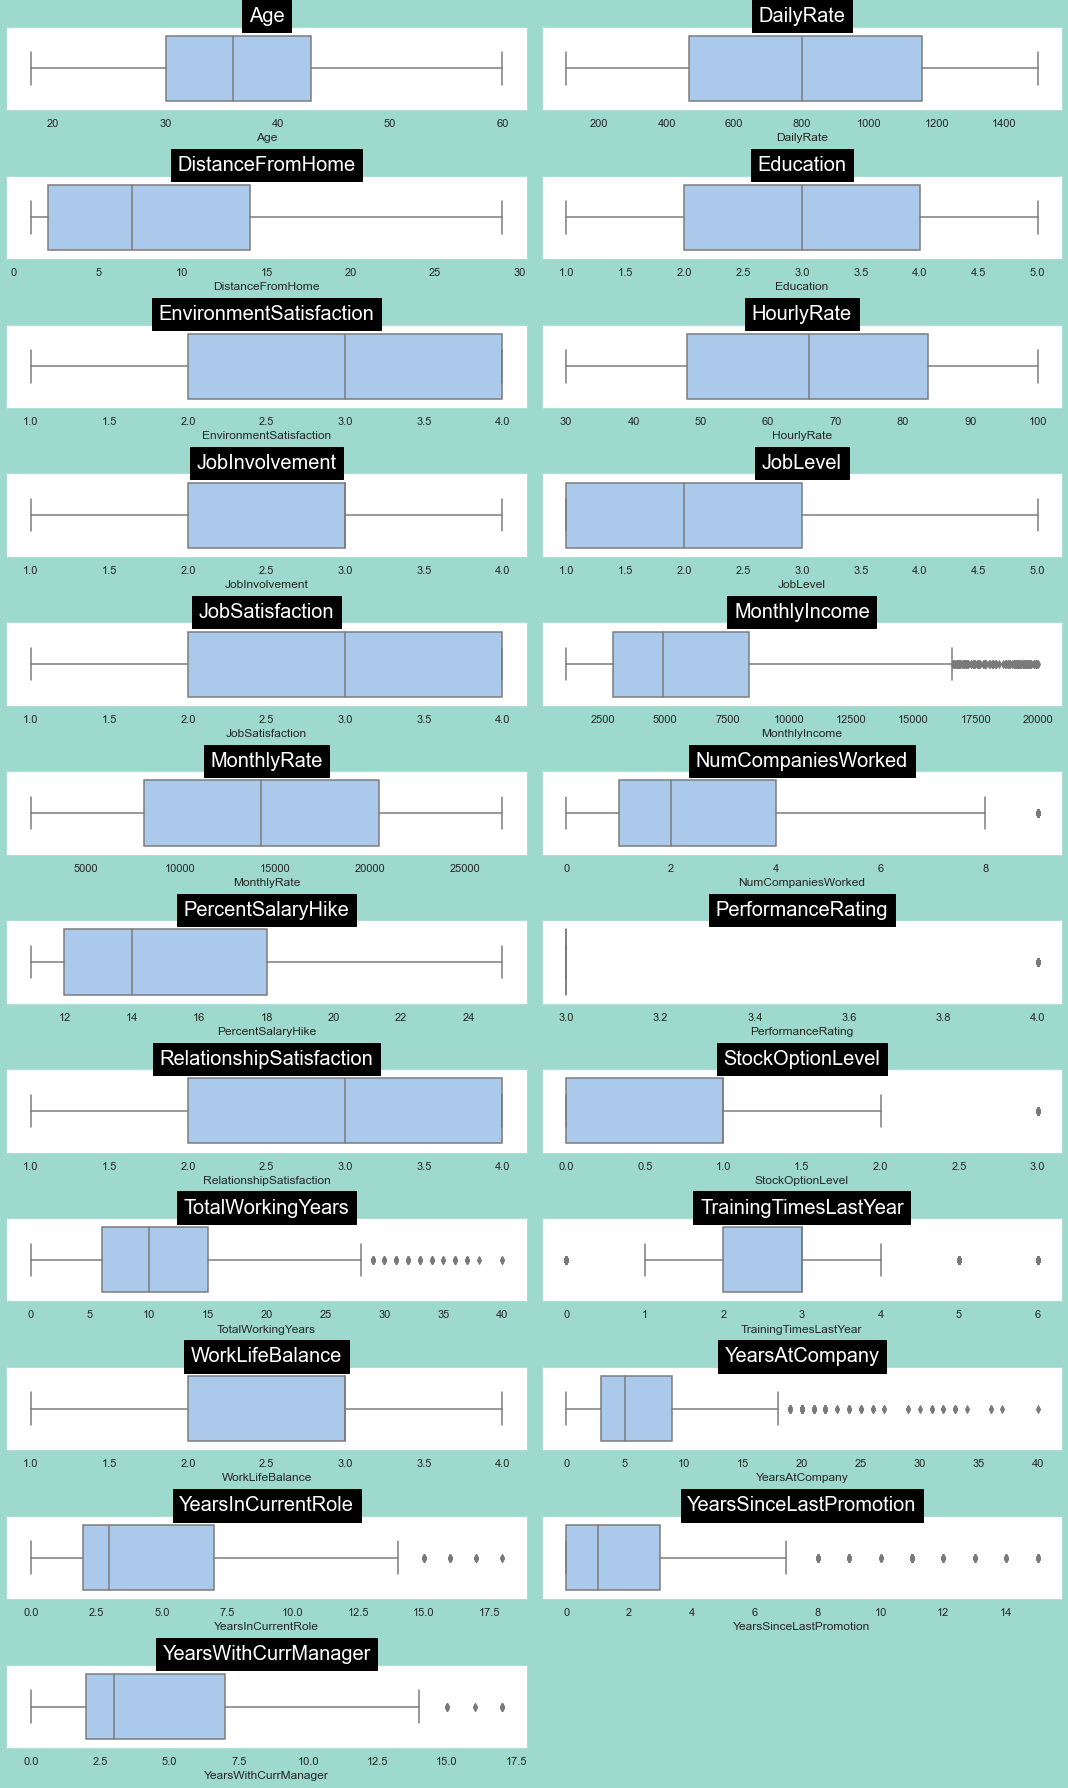

In [17]:
plt.figure(figsize=(15, 25))
for idx, i in enumerate(num):
    plt.subplot(12, 2, idx + 1)
    sns.boxplot(x=i, data=df)
    plt.title(i, backgroundcolor="black", color="white", fontsize=20)
    plt.xlabel(i, size=12)
plt.tight_layout()
plt.show()

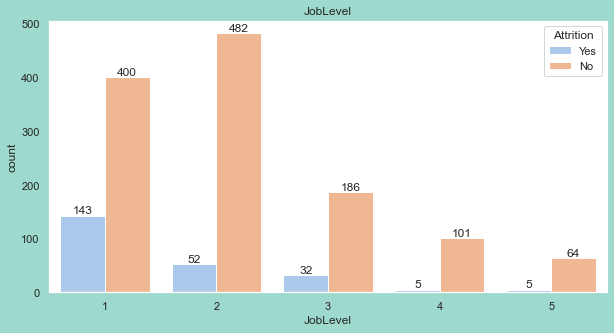

In [18]:
plt.figure(figsize=(10, 5))

ax = sns.countplot(x=df["JobLevel"], hue=df["Attrition"], data=df)
for container in ax.containers:
    ax.bar_label(container)

plt.title("JobLevel")
plt.xlabel("JobLevel")
plt.grid()
plt.show()

<Figure size 360x720 with 0 Axes>

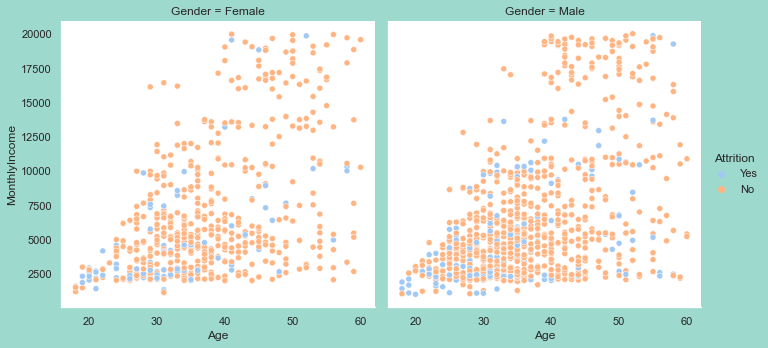

In [19]:
plt.figure(figsize=(5, 10))
sns.relplot(data=df, y="MonthlyIncome", x="Age", hue="Attrition", col="Gender")
plt.show()

<Figure size 360x720 with 0 Axes>

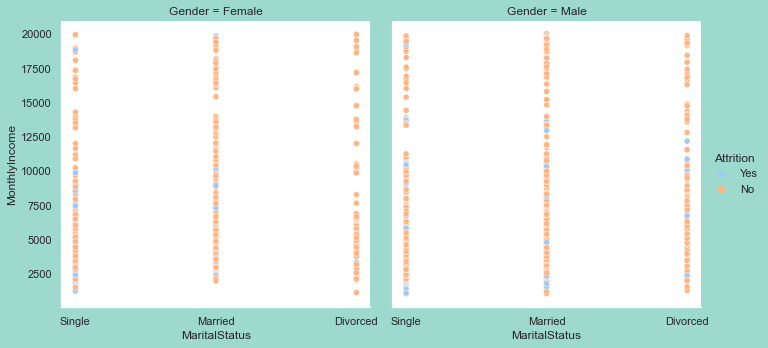

In [20]:
plt.figure(figsize=(5, 10))
sns.relplot(
    data=df, y="MonthlyIncome", x="MaritalStatus", hue="Attrition", col="Gender"
)
plt.show()

<Figure size 360x720 with 0 Axes>

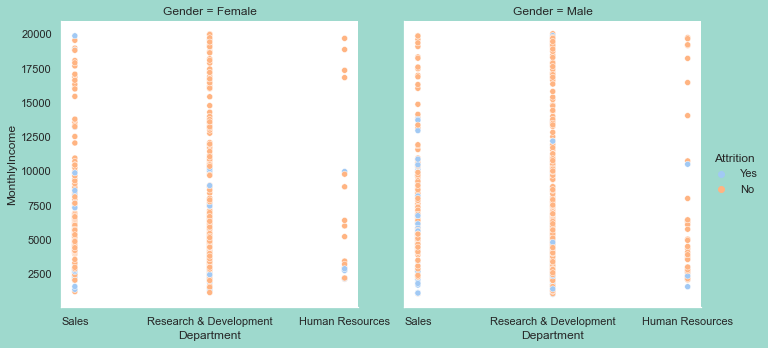

In [21]:
plt.figure(figsize=(5, 10))
sns.relplot(data=df, y="MonthlyIncome", x="Department", hue="Attrition", col="Gender")
plt.show()

<Figure size 360x720 with 0 Axes>

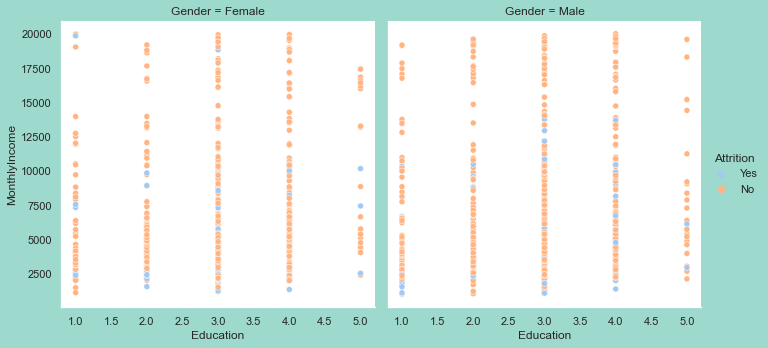

In [22]:
plt.figure(figsize=(5, 10))
sns.relplot(data=df, y="MonthlyIncome", x="Education", hue="Attrition", col="Gender")
plt.show()

<Figure size 360x720 with 0 Axes>

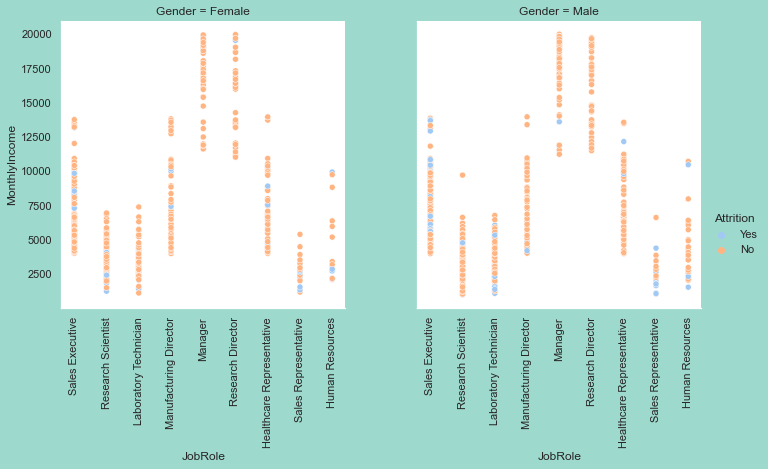

In [23]:
plt.figure(figsize=(5, 10))
ax = sns.relplot(data=df, y="MonthlyIncome", x="JobRole", hue="Attrition", col="Gender")
rotation = 90
for i, ax in enumerate(ax.fig.axes):  ## getting all axes of the fig object
    ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation)
# plt.xticks(rotation=90)
plt.show()

<Figure size 360x720 with 0 Axes>

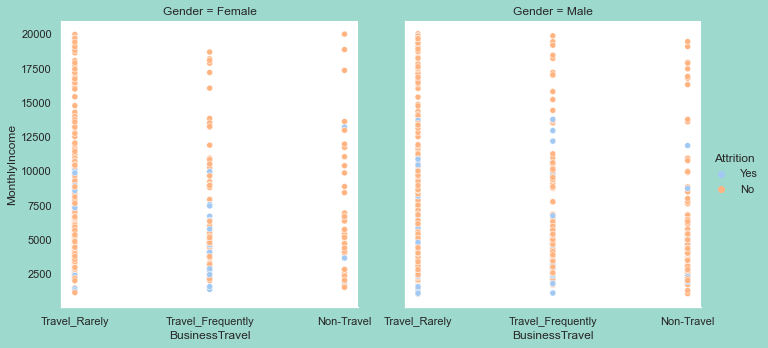

In [24]:
plt.figure(figsize=(5, 10))
sns.relplot(
    data=df, y="MonthlyIncome", x="BusinessTravel", hue="Attrition", col="Gender"
)
plt.show()

💡 Analysis of graphs
Attrition is the highest for both men and women from 18 to 35 years of age and gradually decreases.
As income increases, attrition decreases.
Attrition is much, much less in divorced women.
Attrition is the highest for those in level 1 jobs.
Women with the job position of manager, research director and technician laboratory have almost no attrition.
Men with the position of sales expert have a lot of attrition.
Attrition is higher for employees who usually travel than others, and this rate is higher for women than for men.

In [25]:
df_copy = df.copy()

In [26]:
# convert category attributes with only 2 distinct values to numeric by assigning labels

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_copy["Attrition"] = label_encoder.fit_transform(df["Attrition"])
df_copy["OverTime"] = label_encoder.fit_transform(df["OverTime"])
df_copy["Gender"] = label_encoder.fit_transform(df["Gender"])

In [27]:
# convert category attributes with more than 2 distinct values to numeric using one-hot vector
df_copy = pd.get_dummies(
    df_copy,
    columns=[
        "BusinessTravel",
        "Department",
        "EducationField",
        "JobRole",
        "MaritalStatus",
    ],
)

<AxesSubplot:>

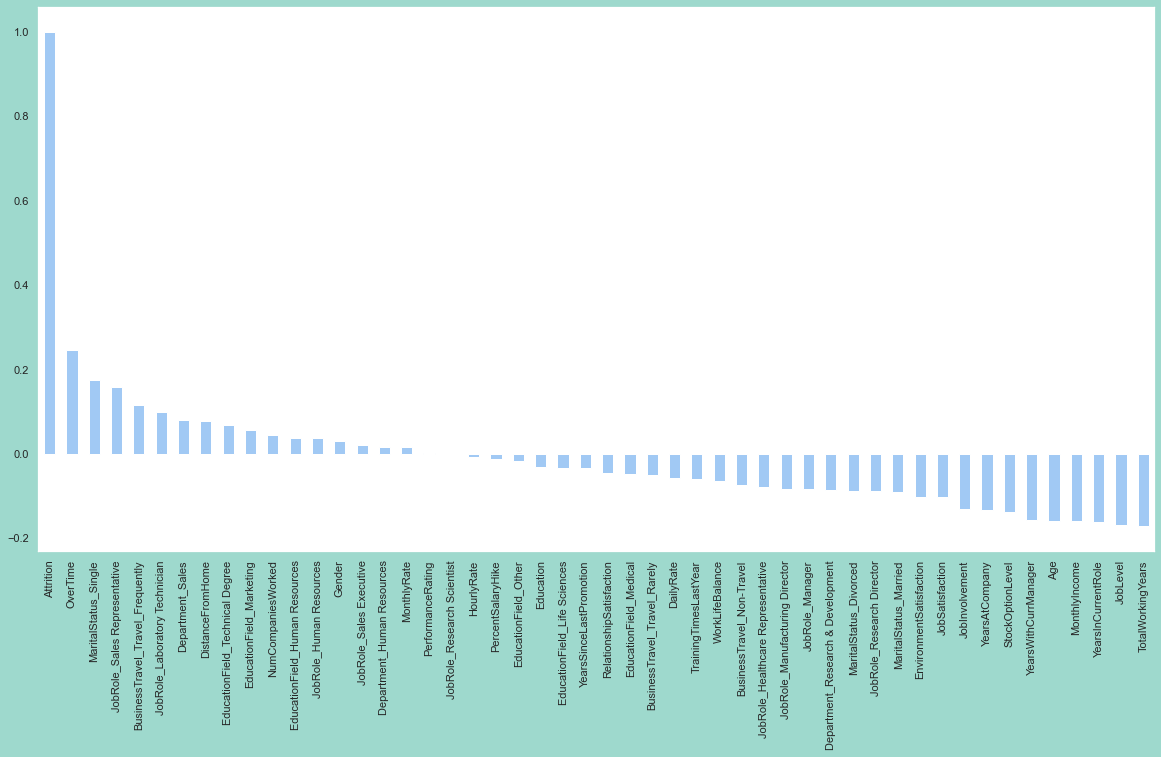

In [28]:
plt.figure(figsize=(20, 10))
correlations = df_copy.corr()
correlations["Attrition"].sort_values(ascending=False).plot(kind="bar")

In [29]:
# df2_copy = df2.copy()
# df2_copy = df2_copy.drop(["EmployeeCount", "EmployeeNumber", "StandardHours"], axis=1)

# corr = df2_copy.corr(method="spearman")
# sns.set(style="white")

# mask = np.triu(np.ones_like(corr, dtype=bool))
# plt.figure(figsize=(12, 10), dpi=100)
# sns.heatmap(
#     corr,
#     mask=mask,
#     cmap="winter",
#     vmax=0.3,
#     center=0,
#     square=True,
#     linewidths=0.5,
#     cbar_kws={"shrink": 0.8},
#     annot=True,
#     fmt=".2f",
# )
# plt.title("Correlation Matrix", fontsize=20)
# plt.show()

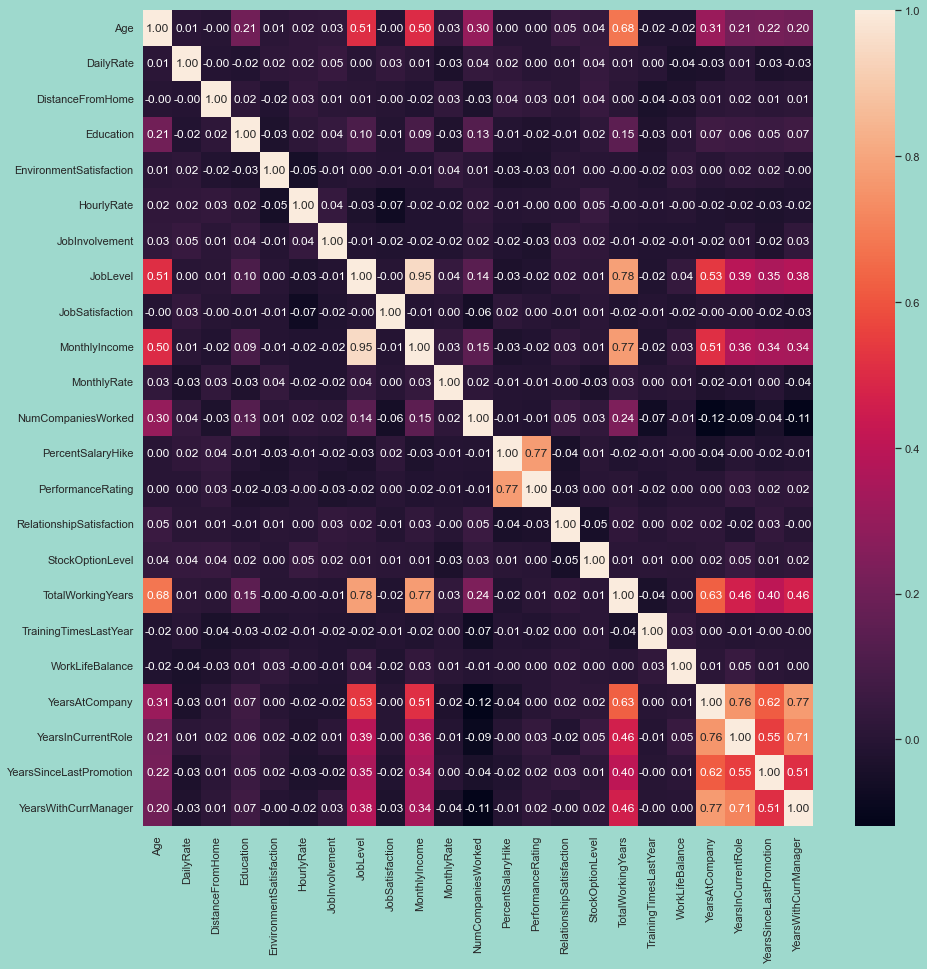

In [30]:
# 画一个热力图
df2_copy = df2.copy()
df2_copy = df2_copy.drop(["EmployeeCount", "EmployeeNumber", "StandardHours"], axis=1)
# df2_copy["Attrition"] = df2_copy["Attrition"].apply(lambda x: 1 if x == "Yes" else 0)
corr = df2_copy.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

There are high correlation between some features:

monthlyincome & joblevel
year at company, year in current role & Years with curr manager

Machine Learning Model

In [31]:
DF = df.copy()

In [32]:
DF["Attrition"] = pd.factorize(DF["Attrition"])[0]
DF["BusinessTravel"] = pd.factorize(DF["BusinessTravel"])[0]
DF["Department"] = pd.factorize(DF["Department"])[0]
DF["EducationField"] = pd.factorize(DF["EducationField"])[0]
DF["Gender"] = pd.factorize(DF["Gender"])[0]
DF["JobRole"] = pd.factorize(DF["JobRole"])[0]
DF["MaritalStatus"] = pd.factorize(DF["MaritalStatus"])[0]
DF["OverTime"] = pd.factorize(DF["OverTime"])[0]

In [33]:
DF = DF.drop(
    ["YearsAtCompany", "MonthlyIncome", "YearsInCurrentRole", "YearsWithCurrManager"],
    axis=1,
)

In [34]:
#normalize data
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

DF1 = DF.drop(columns=["Attrition"])
norm = scaler.fit_transform(DF)
norm_df = pd.DataFrame(norm, columns=DF.columns)

In [35]:
X = pd.DataFrame(norm_df.drop(columns="Attrition"))
y = pd.DataFrame(norm_df["Attrition"]).values.reshape(-1, 1)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [37]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [38]:
# SMOTE(Synthetic Minority Over-sampling Technique)

from imblearn.over_sampling import SMOTE

oversampler = SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_resample(X_train, y_train)

In [50]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(C=1000,max_iter=10000)
logreg.fit(smote_train, smote_target)
lr_pred = logreg.predict(X_test)
print('Accuracy of LR on test set: {:.2f}'.format(accuracy_score(y_test, lr_pred)))

Accuracy of LR on test set: 0.75


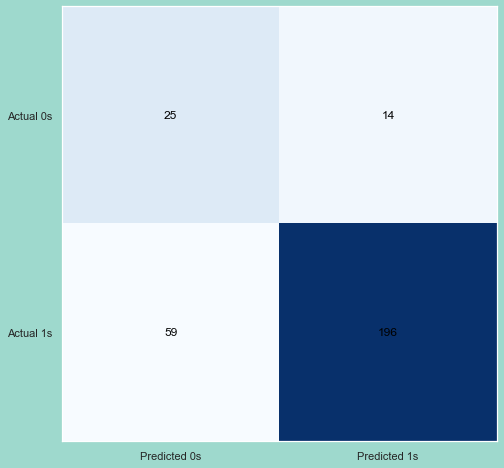

              precision    recall  f1-score   support

         0.0       0.30      0.64      0.41        39
         1.0       0.93      0.77      0.84       255

    accuracy                           0.75       294
   macro avg       0.62      0.70      0.62       294
weighted avg       0.85      0.75      0.79       294



In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(confusion_matrix(y_test, y_pred), cmap='Blues')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix(y_test, lr_pred)[i, j], ha='center', va='center', color='black')
plt.show()

# Classification report
print(classification_report(y_test, lr_pred))



In [41]:
# Random Forest Classifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(smote_train, smote_target)
y_pred = rfc.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9829931972789115


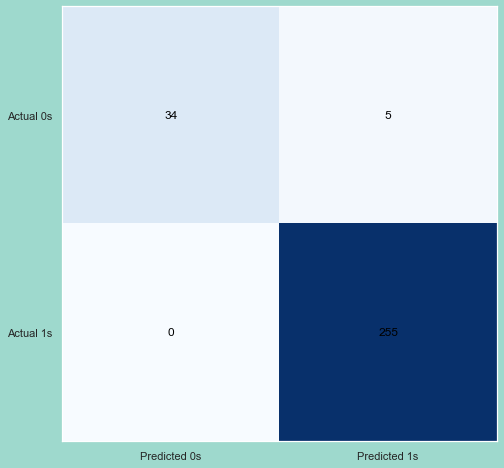

              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93        39
         1.0       0.98      1.00      0.99       255

    accuracy                           0.98       294
   macro avg       0.99      0.94      0.96       294
weighted avg       0.98      0.98      0.98       294



In [42]:
# Confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(confusion_matrix(y_test, y_pred), cmap='Blues')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix(y_test, y_pred)[i, j], ha='center', va='center', color='black')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

In [43]:
from sklearn.model_selection import GridSearchCV

In [47]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# Modifying the parameters
param_grid = {
    "n_estimators": [100, 200, 300, 400, 500],
    "learning_rate": [0.1, 0.05, 0.02, 0.01],
    "max_depth": [4, 6, 8],
    "min_samples_leaf": [1, 5, 10, 20],
    "max_features": [1.0, 0.5, 0.1],
}
# Creating the model
optimal_params = GridSearchCV(
    estimator=GradientBoostingClassifier(),
    param_grid=param_grid,
    scoring="accuracy",
    verbose=0,
    n_jobs=-1,
    cv=5,
)
# Fitting the model
optimal_params.fit(
    smote_train,
    smote_target,
)
# Printing the best parameters
print(optimal_params.best_params_)

{'learning_rate': 0.05, 'max_depth': 8, 'max_features': 0.1, 'min_samples_leaf': 1, 'n_estimators': 500}


In [53]:
gb_param = {'learning_rate':0.05,
            'max_depth':8,
            'max_features':0.1,
            'min_samples_leaf':1,
            'n_estimators':500}

gb=GradientBoostingClassifier(**gb_param)
gb.fit(smote_train, smote_target)
gb_pred = gb.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9761904761904762


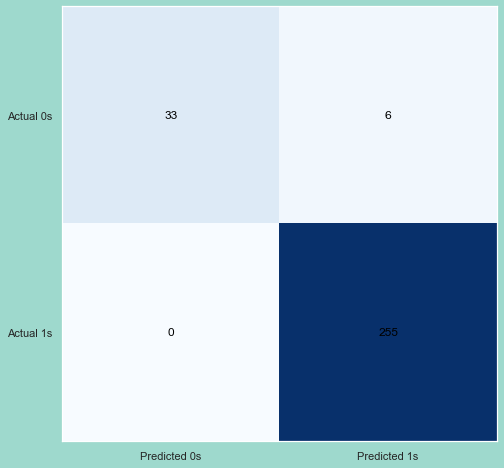

              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92        39
         1.0       0.98      1.00      0.99       255

    accuracy                           0.98       294
   macro avg       0.99      0.92      0.95       294
weighted avg       0.98      0.98      0.98       294



In [54]:
# Confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(confusion_matrix(y_test, y_pred), cmap='Blues')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix(y_test, gb_pred)[i, j], ha='center', va='center', color='black')
plt.show()

# Classification report
print(classification_report(y_test, gb_pred))